# Project 1

## Part 1 - Rat sighting data analysis

### Group 6 ; Bryce Claypool, Isaac Updike, Michael Pezzetti, Paul Li 


<img src="https://cdn.vox-cdn.com/thumbor/6eRlofJlgBvxt_uajyTzqTFplg0=/0x80:472x346/1600x900/cdn.vox-cdn.com/uploads/chorus_image/image/47234344/Screen_Shot_2015-09-21_at_4.54.12_PM.0.0.png" width= 600><p style="text-align: right;">
</p>


First lets import packages. We'll be using tidyverse and dslabs to wrangle our rat sightings data and make some plots with ggplot2


In [1]:
library(ggplot2)
library(tidyr)
library(tidyverse)
library(dslabs)
library(lubridate)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.4     v dplyr   1.0.2
v readr   1.4.0     v stringr 1.4.0
v purrr   0.3.4     v forcats 0.5.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'dslabs' was built und

The starter code below reads in the data and uses some lubridate functions to create adittional variables describeing the sighting dates

In [5]:
rats_raw <- read_csv("data/Rat_Sightings.csv", na = c("", "NA", "N/A"))
# If you get an error that says "All formats failed to parse. No formats
# found", it's because the mdy_hms function couldn't parse the date. The date
# variable *should* be in this format: "04/03/2017 12:00:00 AM", but in some
# rare instances, it might load without the seconds as "04/03/2017 12:00 AM".
# If there are no seconds, use mdy_hm() instead of mdy_hms().
rats_clean <- rats_raw %>%
  rename(created_date = `Created Date`,
         location_type = `Location Type`,
         borough = Borough) %>%
  mutate(created_date = mdy_hms(created_date)) %>%
  mutate(sighting_year = year(created_date),
         sighting_month = month(created_date),
         sighting_day = day(created_date),
         sighting_weekday = wday(created_date, label = TRUE, abbr = FALSE)) %>%
  filter(borough != "Unspecified")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  .default = col_character(),
  `Unique Key` = col_double(),
  `Incident Zip` = col_double(),
  `Facility Type` = col_logical(),
  `Due Date` = col_logical(),
  `X Coordinate (State Plane)` = col_double(),
  `Y Coordinate (State Plane)` = col_double(),
  `Vehicle Type` = col_logical(),
  `Taxi Company Borough` = col_logical(),
  `Taxi Pick Up Location` = col_logical(),
  `Bridge Highway Name` = col_logical(),
  `Bridge Highway Direction` = col_logical(),
  `Road Ramp` = col_logical(),
  `Bridge Highway Segment` = col_logical(),
  Latitude = col_double(),
  Longitude = col_double()
)
i Use `spec()` for the full column specifications.

Warning message:
"132232 parsing failures.
 row      col           expected                 actual                     file
2247 Due Date 1/0/T/F/TRUE/FALSE 08/28/2018 12:29:04 PM 'data/Rat_Sightings.csv'
2248 Due Date 1/0/T/F/TRU

In [5]:
head(rats_raw)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
47782138,10/04/2020 02:07:51 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Catch Basin/Sewer,10007,292 GREENWICH STREET,...,NA,NA,NA,NA,NA,NA,NA,40.71602,-74.01104,"(40.71601701964443, -74.01103839517805)"
47781357,10/04/2020 01:07:34 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11226,120 EAST 19 STREET,...,NA,NA,NA,NA,NA,NA,NA,40.64644,-73.96155,"(40.64643937078732, -73.96155364982612)"
47784412,10/04/2020 03:54:51 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10460,811 EAST 178 STREET,...,NA,NA,NA,NA,NA,NA,NA,40.84449,-73.88691,"(40.84448706226224, -73.8869089837199)"
47782513,10/04/2020 01:14:24 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),10026,7 AVENUE,...,NA,NA,NA,NA,NA,NA,NA,40.80003,-73.95486,"(40.800030819492065, -73.9548552168686)"
47782170,10/04/2020 08:28:15 PM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,890 FLUSHING AVENUE,...,NA,NA,NA,NA,NA,NA,NA,40.70209,-73.93623,"(40.70208667656569, -73.93622510731538)"
47783865,10/04/2020 08:10:26 AM,NA,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11429,215-01 104 AVENUE,...,NA,NA,NA,NA,NA,NA,NA,40.71203,-73.74355,"(40.712034705477286, -73.74354902753882)"


We approached the project by loading the data and identifying which variables stood out. First, we took notice of the variables that stood out and decided as a group on which ones would work best in our project. We figured narrowing down the sightings to boroughs would be the best fit for our visualization. Our goal is to get as specific as possible in our graph in order to provide a better visualization for each borough. We are specifically looking for the borough with the highest increase in rat sightings over the last decade.  
  
Our data suggests that Brooklyn is the borough that has the highest consistent increase in sightings whereas every other borough is consistently the same or had an increase lower that of Brooklyn. We understand that Brooklyn does have a higher population as well as more land than some of the other boroughs, so to compensate for different initial rat populations and focus on year-over-year change, we applied the diff() function and graphed cumulative percent change. Looking at annual percentage change shows the noisiness of the data and similarity in overall trend. Further analysis of anual trends should investigate the seasonality of the data, and where the changes came from. 
  
The data also brings up a whole new topic of discussion that we did not intend on finding. This data implicates a dramatic increase of rats over the years 2010-2017. From years 2017-2019, however, every borough began to lower in rat sightings or remained relatively the same. The extremity came in year 2020, where not only Brooklyn had a major decrease in sightings, but also every other borough had a decrease as well.  


We came to a conclusion that this could be best explained with two scenarios. The first explanation is that 2020 has yet to be over, so we are missing 2 months of data. This could explain why numbers are so low for 2020 vs 2019. The 2nd explanation is the current global pandemic, Covid-19. It began to spread in the U.S in March 2020, and with businesses closing, there is far less activities happening outside. With people self-quarantined, restaurants were forced to close and streets are left cleaner than usual. Less food/litter is left on the ground and fewer rats are to be seen.  

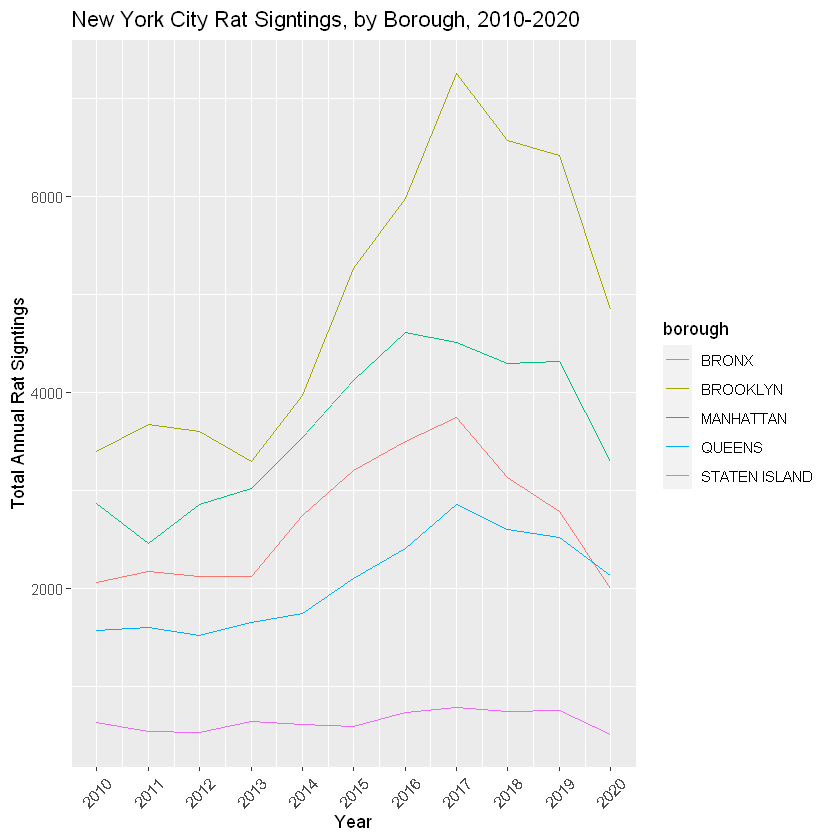

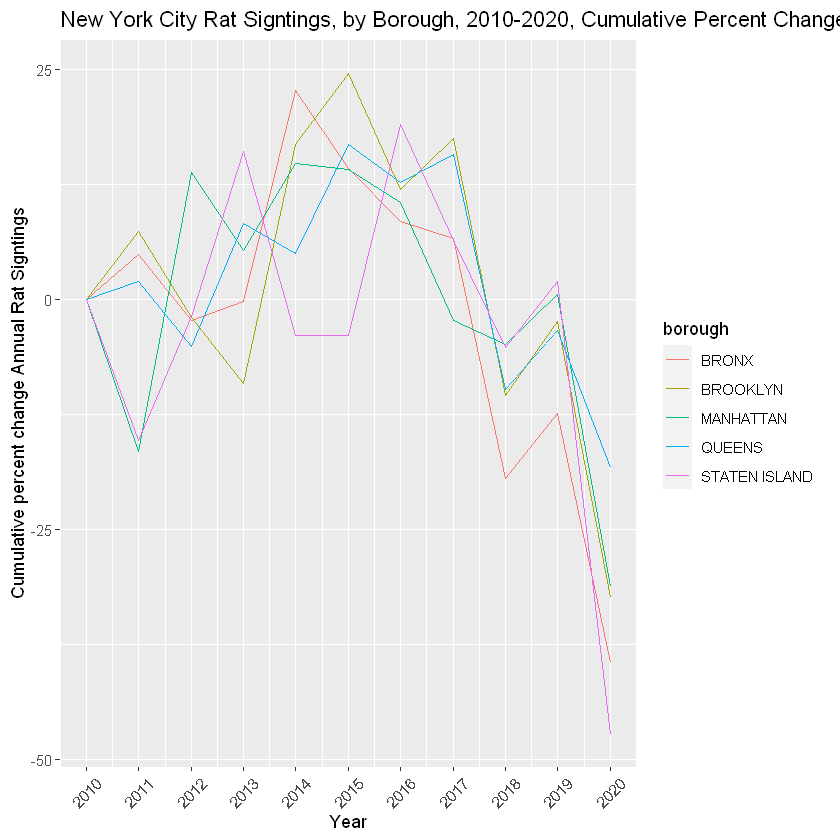

In [56]:
boro <- rats_clean %>%
    count(borough, sighting_year) %>%
    mutate(chnge = c(0, diff(n)))

boro[c(12,23,34,45),4] <- 0

boro <- boro %>%
    mutate(pct = (((n+chnge)/n)*100)-100)


ggplot(data=boro, aes(x=sighting_year, y=n, colour=borough)) + scale_x_continuous(breaks = c(2010:2020)) + 
    geom_line() + ggtitle("New York City Rat Signtings, by Borough, 2010-2020") +
    labs(x="Year",y="Total Annual Rat Signtings") + 
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=.5))

ggplot(data=boro, aes(x=sighting_year, y=pct, colour=borough)) + scale_x_continuous(breaks = c(2010:2020)) + 
    geom_line() + ggtitle("New York City Rat Signtings, by Borough, 2010-2020, Cumulative Percent Change") +
    labs(x="Year",y="Cumulative percent change Annual Rat Signtings") + 
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=.5))


# Part 2 - Data Sources

## Integrated Public Use Microdata Series - Current Population Survey

### https://cps.ipums.org/cps/index.shtml

The Current Population Survey is a survey conducted by the US Cenesus Bureau every month of around 60,000 households. In the Economic Suppliment series there is survey data responces at the household and the invdividual level for employment, income, and health data. Most commonly known for being the source for BLS uneployment report statistics, this data contains trends that encompass America's economy over the past 50 years. Unlike summary reports from the census website, these are actual survey responces allowing for more detailed analysis at the person and family level. 



## S&P 500 Constituents  

### https://datahub.io/core/s-and-p-500-companies-financials

This file essentially contains stock market data. This data has some of the highlights of information used to understand and value the given stock. We can use this dataset to show many different aspects of the stock including price, EBITDA, earnings, PE ratio, and much more. This file is interesting because it would be very beneficial to figure out more about specific stocks and how they move. If you are able to make sound predictions in the stock market using data analytics, it could be an extremely powerful tool. If understood, we can even understand more about humans in general and why people seem to sell or buy at specific points.


## Estimating Low Income Job loss due to COVID-19

### https://github.com/UrbanInstitute/covid-neighborhood-job-analysis


This datafile accesses information on the number of low-income jobs lost due to covid19 in every state in the U.S. The U.S unemployment rate has taken the biggest hit since the great depression and it is important to see the spread of lost jobs throughout the nation.This dataset was provided by the Urban Institute Data and Research team. The Urban Institute monitors COVID-19 unemployment rates and establish policies to help protect families and communities


